In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

In [5]:
penguins1 = pd.read_csv('penguins.csv')
penguins1

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


In [6]:
penguins1.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

<Axes: >

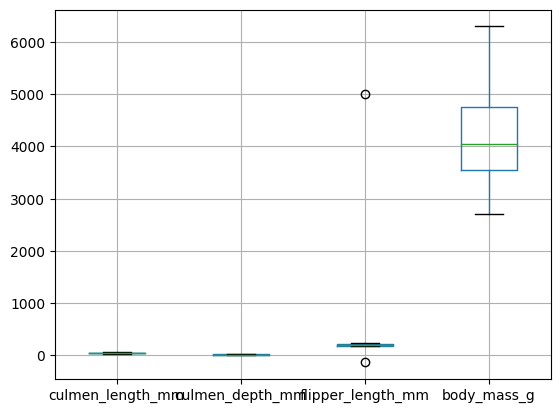

In [7]:
penguins1.boxplot()

In [8]:
penguins1[penguins1["flipper_length_mm"] < 0 ]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
14,34.6,21.1,-132.0,4400.0,MALE


In [9]:
penguins1[penguins1["flipper_length_mm"] > 4000]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
9,42.0,20.2,5000.0,4250.0,MALE


In [10]:
penguins1 = penguins1.dropna()
penguins1 = penguins1.drop([9, 14])

In [11]:
penguins2 = pd.get_dummies(penguins1, columns= ['sex'])
penguins2 = penguins2.drop("sex_.", axis = 1)
penguins2

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True
1,39.5,17.4,186.0,3800.0,True,False
2,40.3,18.0,195.0,3250.0,True,False
4,36.7,19.3,193.0,3450.0,True,False
5,39.3,20.6,190.0,3650.0,False,True
...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,True,False
340,46.8,14.3,215.0,4850.0,True,False
341,50.4,15.7,222.0,5750.0,False,True
342,45.2,14.8,212.0,5200.0,True,False


In [12]:
scaler = StandardScaler()
x = scaler.fit_transform(penguins2)

penguins_preprocessed = pd.DataFrame(x, columns = penguins2.columns)
penguins_preprocessed

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.905520,0.793126,-1.428125,-0.569709,-0.991031,0.997001
1,-0.831938,0.128503,-1.071522,-0.507579,1.009050,-1.003008
2,-0.684775,0.435252,-0.429637,-1.191006,1.009050,-1.003008
3,-1.347011,1.099875,-0.572278,-0.942487,1.009050,-1.003008
4,-0.868729,1.764498,-0.786240,-0.693968,-0.991031,0.997001
...,...,...,...,...,...,...
328,0.584511,-1.763116,0.925454,0.890339,1.009050,-1.003008
329,0.510929,-1.456367,0.996775,0.797145,1.009050,-1.003008
330,1.173166,-0.740619,1.496019,1.915480,-0.991031,0.997001
331,0.216602,-1.200743,0.782813,1.232053,1.009050,-1.003008


In [13]:
pca = PCA(n_components = None)
data_pca = pca.fit(penguins_preprocessed)

data_pca.explained_variance_ratio_

n_components =  sum(data_pca.explained_variance_ratio_ > 0.1)
pca = PCA(n_components = n_components)

penguins_pca = pca.fit_transform(penguins_preprocessed)

print(n_components)

2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

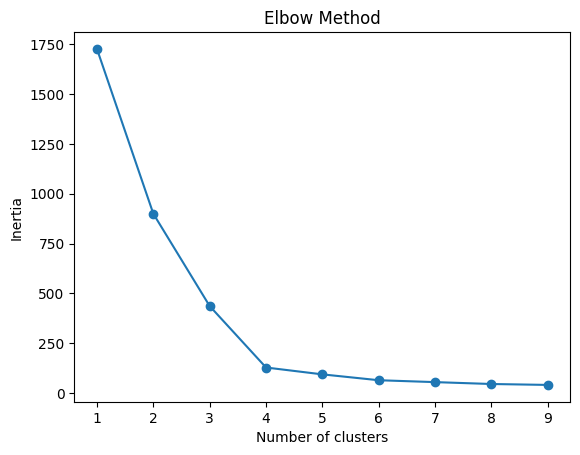

In [14]:
inertia = []

for k in range(1, 10):
  kmeans = KMeans(n_clusters = k, random_state = 42).fit(penguins_pca)
  inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker = 'o')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

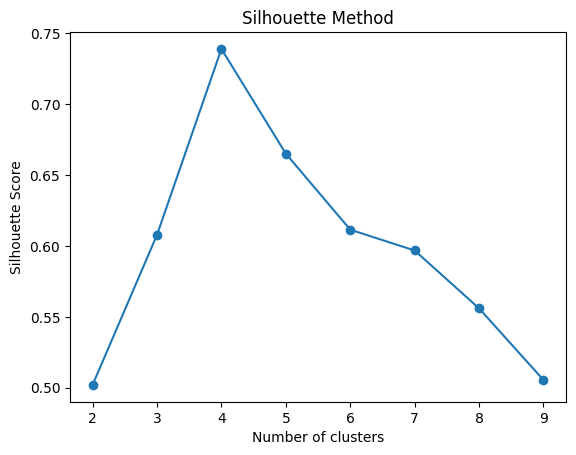

In [22]:
silhouette = []

for k in range(2, 10):
  kmeans = KMeans(n_clusters = k, random_state = 42).fit(penguins_pca)
  silhouette.append(silhouette_score(penguins_pca, kmeans.labels_))

plt.plot(range(2, 10), silhouette, marker = 'o')
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


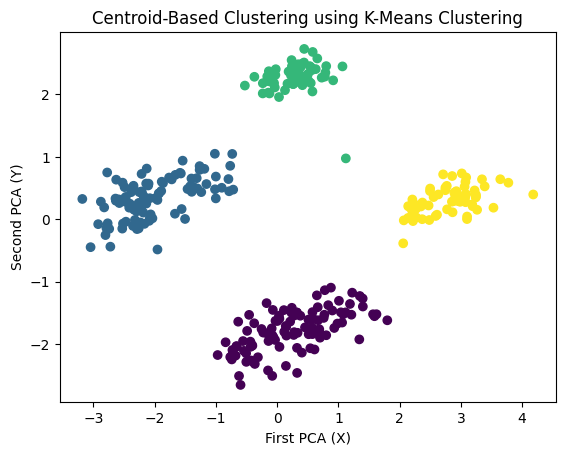

In [15]:
kmeans = KMeans(n_clusters = 4, random_state = 42).fit(penguins_pca)

plt.scatter(penguins_pca[:, 0], penguins_pca[:, 1], c = kmeans.labels_, cmap = "viridis")
plt.title("Centroid-Based Clustering using K-Means Clustering")
plt.xlabel("First PCA (X)")
plt.ylabel("Second PCA (Y)")
plt.show()

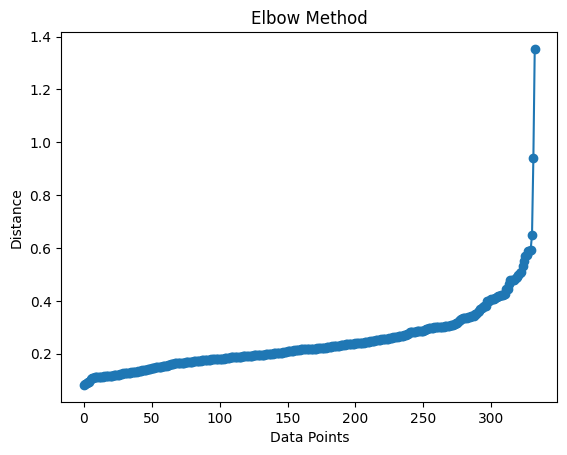

In [27]:
neighbors = NearestNeighbors(n_neighbors = k).fit(penguins_pca)
distances, indices = neighbors.kneighbors(penguins_pca)
distances = np.sort(distances[:, k-1], axis = 0)

plt.plot(distances, marker = 'o')
plt.title("Elbow Method")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

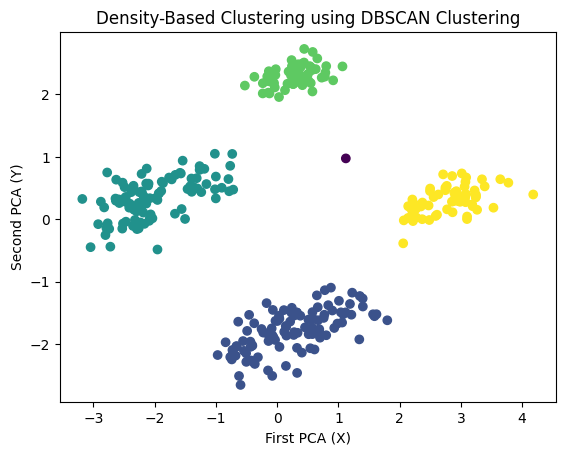

In [26]:
dbscan = DBSCAN(eps = 0.6, min_samples = 5).fit(penguins_pca)

plt.scatter(penguins_pca[:, 0], penguins_pca[:, 1], c = dbscan.labels_, cmap = "viridis")
plt.title("Density-Based Clustering using DBSCAN Clustering")
plt.xlabel("First PCA (X)")
plt.ylabel("Second PCA (Y)")
plt.show()

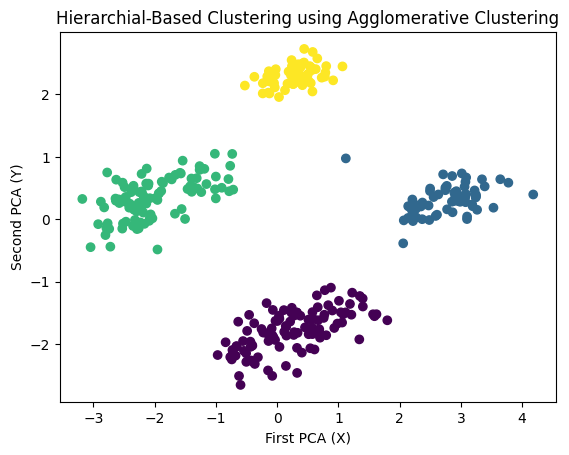

In [17]:
agg = AgglomerativeClustering(n_clusters = 4).fit(penguins_pca)

plt.scatter(penguins_pca[:, 0], penguins_pca[:, 1], c = agg.labels_, cmap = "viridis")
plt.title("Hierarchial-Based Clustering using Agglomerative Clustering")
plt.xlabel("First PCA (X)")
plt.ylabel("Second PCA (Y)")
plt.show()